In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import gocell
import scipy.ndimage as ndi

In [3]:
pipeline = gocell.pipeline.create_default_pipeline(2)

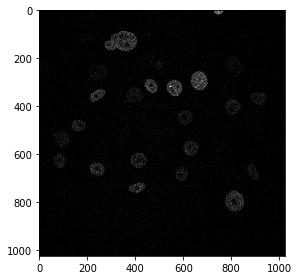

In [4]:
g_raw = gocell.io.imread('~/Documents/data/isbi2013/N2DH-GOWT1/02/t%02d.tif' % 0)
imshow(g_raw, 'gray')
tight_layout()

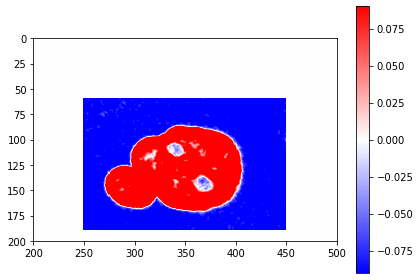

In [5]:
g = gocell.surface.Surface.create_from_image(ndi.gaussian_filter(g_raw, 1))

mask = zeros(g_raw.shape, bool)
mask[60:190, 250:450] = True
t = 0.1
img = (g.model - t)
imshow(img * mask, 'bwr')
colorbar()
clim(-0.1 * abs(img).max(), +0.1 * abs(img).max())
xlim(200, 500)
ylim(200, 0)
tight_layout()

In [6]:
roi = gocell.surface.Surface(g.model.shape, g.model, mask=mask)
J, result = gocell.modelfit.modelfit(g, roi, t, 2., True, bg_radius=100)

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  7.0450e-01  1e+00  1e+00  3e-02
 1: -1.9644e-01  1.8604e-01  1e-02  2e-01  5e-03
 2:  4.4678e-02  9.6587e-02  1e-04  3e-02  2e-03
 3:  4.7118e-02  6.3178e-02  1e-06  9e-03  6e-04
 4:  4.3814e-02  4.9125e-02  1e-08  3e-03  2e-04
 5:  4.0832e-02  4.2584e-02  1e-10  1e-03  9e-05
 6:  3.8449e-02  3.9088e-02  1e-12  4e-04  6e-05
 7:  3.6659e-02  3.6937e-02  1e-14  2e-04  5e-05
 8:  3.5318e-02  3.5460e-02  1e-16  8e-05  4e-05
 9:  3.4284e-02  3.4367e-02  1e-18  5e-05  3e-05
10:  3.3460e-02  3.3513e-02  1e-20  3e-05  3e-05
11:  3.2783e-02  3.2819e-02  1e-22  2e-05  3e-05
12:  3.2213e-02  3.2239e-02  1e-24  2e-05  2e-05
13:  3.1725e-02  3.1744e-02  1e-26  1e-05  2e-05
14:  3.1299e-02  3.1314e-02  1e-28  9e-06  2e-05
15:  3.0923e-02  3.0935e-02  1e-30  7e-06  2e-05
16:  3.0587e-02  3.0597e-02  1e-32  6e-06  2e-05
17:  3.0285e-02  3.0293e-02  1e-34  5e-06  2e-05
18:  3.0011e-02  3.0017e-02  1e-36  4e-06  2e-05
19:  2.9760e-02  2.97

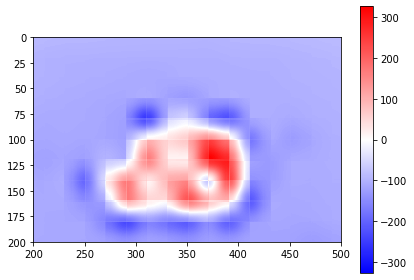

In [10]:
smap = full(g_raw.shape, nan)
#smap[roi.mask] = J.smooth_mat @ result.ξ
smap[roi.mask] = result.s(J.x, J.smooth_mat)
imshow(smap, 'bwr')
colorbar()
clim(-np.nanmax(smap), +np.nanmax(smap))
xlim(200, 500)
ylim(200, 0)
tight_layout()

In [5]:
gocell.mapper.fork.DEBUG = True

In [6]:
data, cfg = pipeline.process_image(g_raw, cfg={
        'preprocess': {
            'remove_dark_spots': True
        },
        'seeds': {
            'max_count': 100,
            'exclude_border': False
        },
        'superpixels_entropy': {
            'sigma': 9.
        },
        'compute_candidates': {
            'max_superpixel_distance': 85,
            'max_superpixel_depth': 2
        },
        'max_setpack_weights': {
            'beta': 1
        },
        'postprocess': {
            'energy_threshold': {
                'gauss_tolerance': 1
            }
        }
    });

Removed 42 dark spots
Superpixels: 100
Discarded 50 superpixels, 50 remaining
Computed superpixel adjacencies
Candidates: 113
Unique candidates: 89
Computed 89 intensity models
Processed candidate 15 / 89 (using 2 forks)
     pcost       dcost       gap    pres   dres
 0:  0.0000e+00  7.2338e-01  1e+00  1e+00  4e-02
 1: -3.3317e-01  5.5000e-01  1e-02  5e-01  2e-02
 2: -1.9929e-01  4.9923e-01  1e-04  4e-01  2e-02
 3: -1.7138e-01  4.6293e-01  1e-06  4e-01  2e-02
 4: -1.5408e-01  4.3553e-01  1e-08  3e-01  1e-02
 5: -1.4182e-01  4.1469e-01  1e-10  3e-01  1e-02
 6: -1.3280e-01  3.9898e-01  1e-12  3e-01  1e-02
 7: -1.2609e-01  3.8733e-01  1e-14  3e-01  1e-02
 8: -1.2111e-01  3.7889e-01  1e-16  3e-01  1e-02
 9: -1.1743e-01  3.7292e-01  1e-18  3e-01  1e-02
10: -1.1473e-01  3.6881e-01  1e-20  3e-01  1e-02
11: -1.1276e-01  3.6607e-01  1e-22  3e-01  1e-02
12: -1.1134e-01  3.6430e-01  1e-24  3e-01  1e-02
13: -1.1030e-01  3.6321e-01  1e-26  3e-01  1e-02
14: -1.0954e-01  3.6254e-01  1e-28  3e-01  1e

KeyboardInterrupt: 

In [ ]:
figure(figsize=(6,6))
imshow(smoothmat2[:100, :100], interpolation='none')

In [ ]:
allclose(smoothmat2, smoothmat1)

In [ ]:
figure(figsize=(10,10))
imshow(smoothmat, interpolation='none')
tight_layout()

In [ ]:
figure(figsize=(6,6))
imshow(gocell.render.render_superpixels(data, border_radius=2))
tight_layout()

In [ ]:
figure(figsize=(6,6))
imshow(gocell.render.render_activity_regions(data))
tight_layout()

In [ ]:
figure(figsize=(6,6))
imshow(gocell.render.render_model_shapes_over_image(data))
tight_layout()

In [ ]:
data, cfg = pipeline.process_image(g_raw, data=data, first_stage='max_setpack_weights',
                                   cfg=gocell.config.derive(cfg, {
        'max_setpack_weights': {
            'alpha': 0
        }
    }))

imshow(gocell.render.render_model_shapes_over_image(data))
tight_layout()

In [ ]:
imshow(gocell.render.rasterize_labels(data))
tight_layout()

In [ ]:
imshow(gocell.render.rasterize_labels(data, merge_overlap_threshold=0.8))
tight_layout()